In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

In [15]:
X_train = sequence.pad_sequences(x_train, maxlen=500)
X_test = sequence.pad_sequences(x_test, maxlen=500)

In [16]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5 , activation='relu'))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [8]:
print(len(X_test))

25000


In [17]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                   validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 49s 98ms/step - loss: 0.4119 - accuracy: 0.7955 - val_loss: 0.3037 - val_accuracy: 0.8781
Epoch 2/100
469/469 [==============================] - 45s 95ms/step - loss: 0.2408 - accuracy: 0.9045 - val_loss: 0.2762 - val_accuracy: 0.8858
Epoch 3/100
469/469 [==============================] - 46s 97ms/step - loss: 0.1899 - accuracy: 0.9302 - val_loss: 0.2734 - val_accuracy: 0.8862
Epoch 4/100
469/469 [==============================] - 45s 95ms/step - loss: 0.1617 - accuracy: 0.9407 - val_loss: 0.2938 - val_accuracy: 0.8771
Epoch 5/100
469/469 [==============================] - 44s 94ms/step - loss: 0.1273 - accuracy: 0.9547 - val_loss: 0.3550 - val_accuracy: 0.8771
Epoch 6/100
469/469 [==============================] - 45s 95ms/step - loss: 0.1005 - accuracy: 0.9654 - val_loss: 0.3351 - val_accuracy: 0.8813


In [18]:
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 13s 16ms/step - loss: 0.3512 - accuracy: 0.8748
Test Accuracy: 0.8748


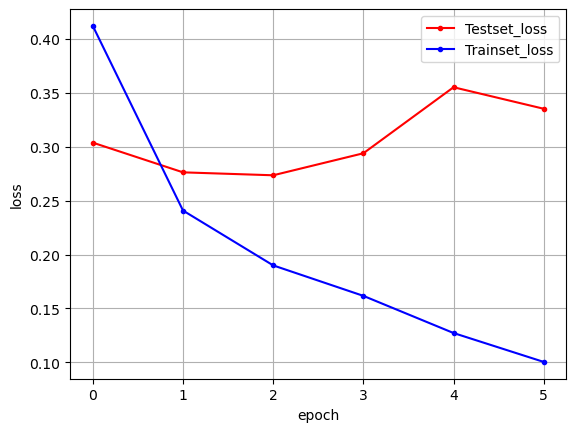

In [19]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()